In [10]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Did this to supress annoying Anaconda warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
def float_to_percentage(value, decimal_places=2):
    if not (0 <= value <= 1):
        raise ValueError("Input value must be between 0 and 1.")
    
    percentage = value * 100
    return f"{percentage:.{decimal_places}f}%"

# Function to Plot the Normal Distribution with the highlighted area of probability
def plot_normal_distribution(mean, std_dev, x_min, x_max, num_points=1000):
    # Generate evenly spaced values for the x-axis
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the PDF (Probability Density Function) of the normal distribution
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # Plot the normal distribution using seaborn's lineplot
    sns.lineplot(x=x, y=pdf, color="blue", lw=2)
    
    # Highlight the offset range under the curve
    offset_mask = (x >= x_min) & (x <= x_max)  # Mask for the range
    plt.fill_between(x, pdf, where=offset_mask, color='lightblue', alpha=0.5, label=f'Offset [{x_min}, {x_max}]')
    
    # Add labels and title
    plt.title(f'Normal Distribution (mean = {mean}, std_dev = {std_dev})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Show the plot
    plt.show()

In [12]:

# Média e variância da distribuição normal
media = 10
variancia = 50

# Desvio padrão é a raiz quadrada da variância
desvio_padrao = variancia ** 0.5
print(desvio_padrao)

7.0710678118654755


a) Probabilidade do valor ser de no máximo 12: 61.14%


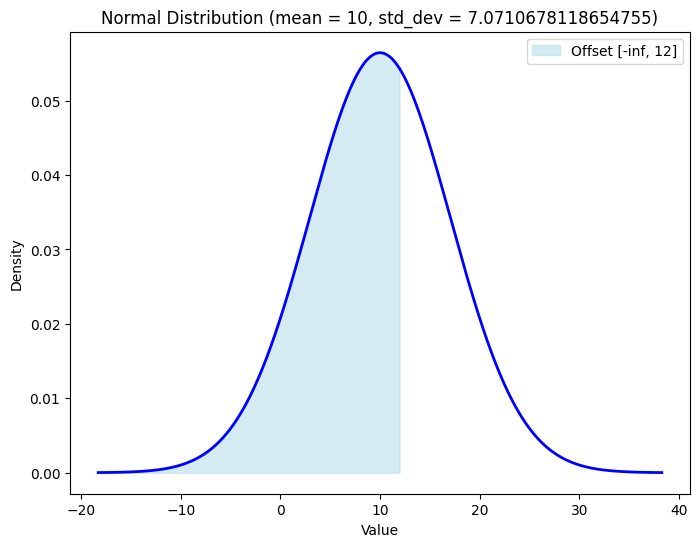

In [13]:
prob_a = norm.cdf(12, media, desvio_padrao)
print("a) Probabilidade do valor ser de no máximo 12:", float_to_percentage(prob_a))

# float('-inf') is negative infinity
plot_normal_distribution(media, desvio_padrao, float('-inf'), 12)

b) Probabilidade do valor de ser de pelo menos 13: 33.57%


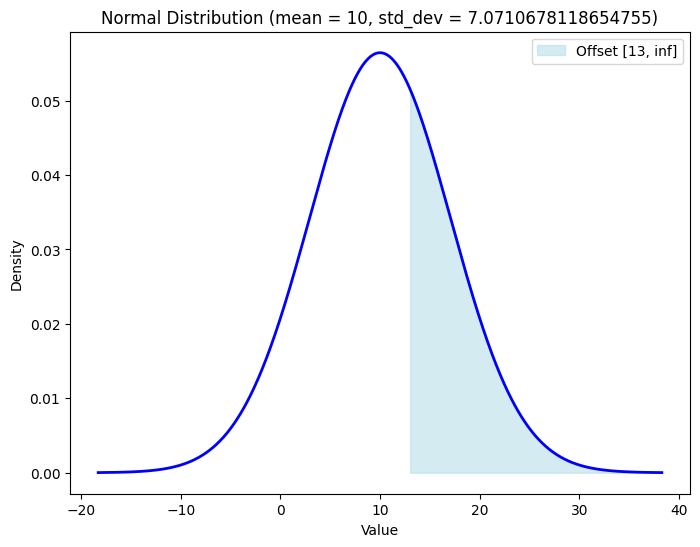

In [14]:

prob_b = 1 - norm.cdf(13, media, desvio_padrao)
print("b) Probabilidade do valor de ser de pelo menos 13:", float_to_percentage(prob_b))

# float('inf') is positive infinity
plot_normal_distribution(media, desvio_padrao, 13, float('inf'))

c) Probabilidade de um valor entre 9 e 11: 11.25%


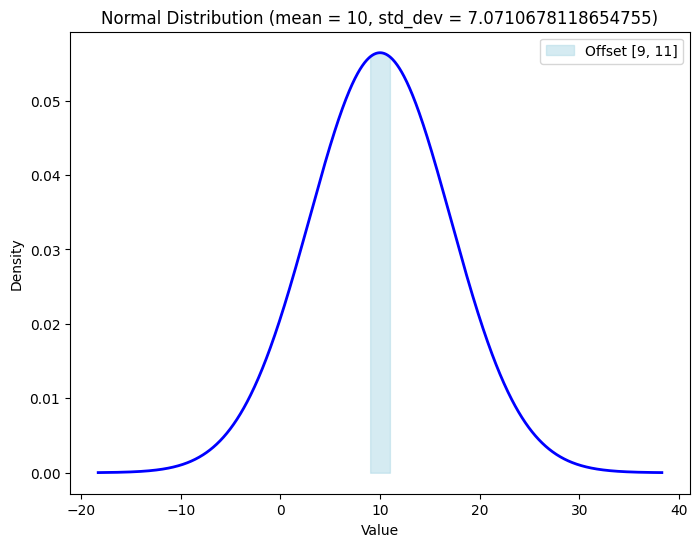

In [15]:
prob_c = norm.cdf(11, media, desvio_padrao) - norm.cdf(9, media, desvio_padrao)
print("c) Probabilidade de um valor entre 9 e 11:", float_to_percentage(prob_c))

plot_normal_distribution(media, desvio_padrao, 9, 11)

d) Probabilidade de ser maior do que 8: 61.14%


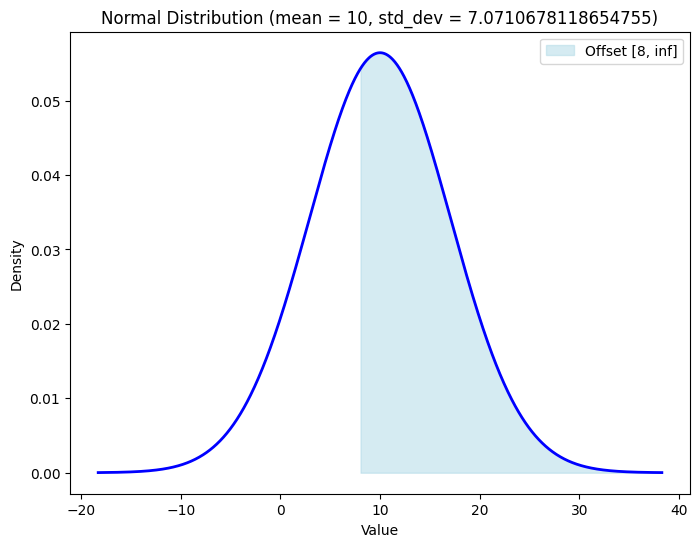

In [16]:
prob_d = 1 - norm.cdf(8, media, desvio_padrao)
print("d) Probabilidade de ser maior do que 8:", float_to_percentage(prob_d))

plot_normal_distribution(media, desvio_padrao, 8, float('inf'))